In [7]:
from neural_network import *

from matplotlib import pyplot as plt

In [8]:
file_path = "../Data/01_Inicial_v8.xlsx"

D = Data_loader(file_path,seed=0)

In [9]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

NN.set_norms(D.X1_norm,D.X2_norm,D.Y1_norm,D.Y2_norm)

In [10]:
# Set hyperparameters
n_epochs1 = 300
batch_size1 = 80
n_epochs2 = 1000
batch_size2 = 80
n_epochs3 = 100
batch_size3 = 80

lr1 = 1e-3
lr2 = 1e-3
lr3 = 1e-3

scheduler_step1 = 100
scheduler_gamma1 = 0.9

scheduler_step2 = 100
scheduler_gamma2 = 0.9

scheduler_step3 = 100
scheduler_gamma3 = 0.75

layers1 = [8 for _ in range(2)]
layers2 = [16 for _ in range(4)]

dropout1 = 0.2
dropout2 = 0.2

In [11]:
# Pre-train the first network
NN.init_net1(layers=layers1, dropout=dropout1)

loss1_train_pre = []
loss1_val_pre = []

opt1 = torch.optim.Adam(NN.net1.parameters(),lr=lr1)
sch1 = torch.optim.lr_scheduler.StepLR(opt1, step_size=scheduler_step1, gamma=scheduler_gamma1)

for epoch in range(n_epochs1):

  NN.net1.train()
  opt1.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  for X1, Y1_target in D.get_batch1(batch_size=batch_size1):
    Y1_pred = NN.net1(X1)
    loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')
    loss.backward()
    opt1.step()

    loss_train_epoch += loss.item()

  NN.net1.eval()
  with torch.no_grad():
    for X1, Y1_target in D.get_batch1(batch_size=batch_size1,validation=True):
      Y1_pred = NN.net1(X1)
      loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')

      loss_val_epoch += loss.item()

  loss_train_epoch = loss_train_epoch/(D.n_train*output_size1)
  loss_val_epoch = loss_val_epoch/(D.n_val*output_size1)

  loss1_train_pre.append(loss_train_epoch)
  loss1_val_pre.append(loss_val_epoch)

  sch1.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch}, Validation loss: {loss_val_epoch}')

Epoch: 0, Loss: 1.098411660445364, Validation loss: 1.3204864957439366
Epoch: 10, Loss: 0.9851834576829035, Validation loss: 1.1647782966272155
Epoch: 20, Loss: 0.846244396123671, Validation loss: 0.9988781373892257
Epoch: 30, Loss: 0.6665272390035758, Validation loss: 0.7804577386201318
Epoch: 40, Loss: 0.4721681157449134, Validation loss: 0.5670772951040695
Epoch: 50, Loss: 0.3928739038625158, Validation loss: 0.39281326977174674
Epoch: 60, Loss: 0.28803773392411997, Validation loss: 0.28092182216359607
Epoch: 70, Loss: 0.2792589933352363, Validation loss: 0.2047674549159719
Epoch: 80, Loss: 0.22132532578661926, Validation loss: 0.1595050754831798
Epoch: 90, Loss: 0.17515720819172106, Validation loss: 0.13771874157350456
Epoch: 100, Loss: 0.20977462323984705, Validation loss: 0.11750194207945866
Epoch: 110, Loss: 0.1613926286984207, Validation loss: 0.1042943712490708
Epoch: 120, Loss: 0.16547967078990505, Validation loss: 0.09985576458831331
Epoch: 130, Loss: 0.13287041420327092, Va

In [12]:
# Train the second network
NN.init_net2(layers=layers2, dropout=dropout2)

loss1_train = []
loss1_val = []
loss2_train = []
loss2_val = []
loss_train = []
loss_val = []

opt2 = torch.optim.Adam(NN.net2.parameters(),lr=lr2)
sch2 = torch.optim.lr_scheduler.StepLR(opt2, step_size=scheduler_step2, gamma=scheduler_gamma2)

for epoch in range(n_epochs2):
  NN.train()
  opt2.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size2):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt2.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size2,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch2.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.5704562697299691 (0.10879759234051371 + 1.032114978169286), Validation loss: 0.7101663660120081 (0.046612041967886465 + 1.3737206635651764)
Epoch: 10, Loss: 0.5643091955850291 (0.16356996935467388 + 0.9650484306867733), Validation loss: 0.6674984825981988 (0.046612041967886465 + 1.288384896737558)
Epoch: 20, Loss: 0.47874560688817225 (0.10552778909372729 + 0.8519634158112283), Validation loss: 0.5755301581488715 (0.046612041967886465 + 1.1044482478389033)
Epoch: 30, Loss: 0.3993997440781704 (0.1331800904384879 + 0.6656194110249364), Validation loss: 0.4295049243503147 (0.046612041967886465 + 0.8123977802417897)
Epoch: 40, Loss: 0.32272689287052597 (0.1131832388944404 + 0.5322705645893895), Validation loss: 0.3090656068589952 (0.046612041967886465 + 0.5715191452591507)
Epoch: 50, Loss: 0.2957164409548737 (0.12658724230389262 + 0.46484563073446583), Validation loss: 0.2807273864746094 (0.046612041967886465 + 0.5148427398116501)
Epoch: 60, Loss: 0.2998905536740325 (0.147

In [13]:
# Fine-tune both networks
opt3 = torch.optim.Adam(NN.parameters(),lr=lr3)
sch3 = torch.optim.lr_scheduler.StepLR(opt3, step_size=scheduler_step3, gamma=scheduler_gamma3)

for epoch in range(n_epochs3):
  NN.train()
  opt3.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size3):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt3.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size3,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch3.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.15041265265886175 (0.1424808945766715 + 0.15834440630535745), Validation loss: 0.06953966176068341 (0.050948500633239746 + 0.08813082730328595)
Epoch: 10, Loss: 0.1360520030176917 (0.12869029821351516 + 0.14341370338617368), Validation loss: 0.07811041231508609 (0.04784182265952781 + 0.1083790108009621)
Epoch: 20, Loss: 0.1212065297503804 (0.12507670646490052 + 0.11733635747155478), Validation loss: 0.07462335515905309 (0.04667362018867775 + 0.10257308571426957)
Epoch: 30, Loss: 0.13252028975375862 (0.12502579356348792 + 0.14001478150833485), Validation loss: 0.06561002024897823 (0.0402763772893835 + 0.09094366320857296)
Epoch: 40, Loss: 0.12381124052890512 (0.10124054509539937 + 0.14638193041779274), Validation loss: 0.07570531633165148 (0.04294364099149351 + 0.10846698725665058)
Epoch: 50, Loss: 0.13406154721282248 (0.1316320397133051 + 0.13649105693018715), Validation loss: 0.06849997131912797 (0.04032131477638527 + 0.09667862786187066)
Epoch: 60, Loss: 0.136796006

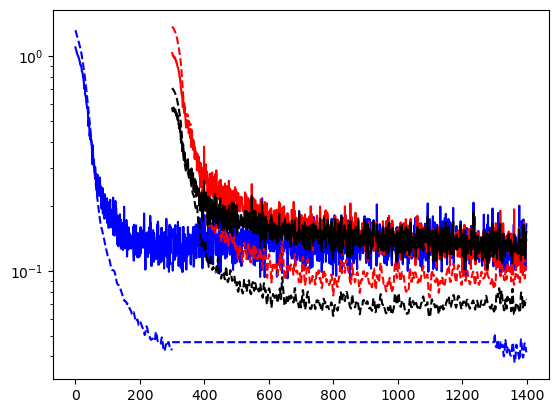

In [14]:
plt.figure()

epochs1 = range(len(loss1_train_pre))
epochs2 = range(len(loss1_train_pre),len(loss1_train_pre)+len(loss_train))

plt.plot(epochs1,loss1_train_pre,'b')
plt.plot(epochs1,loss1_val_pre,'b--')

plt.plot(epochs2,loss1_train,'b')
plt.plot(epochs2,loss1_val,'b--')

plt.plot(epochs2,loss2_train,'r')
plt.plot(epochs2,loss2_val,'r--')

plt.plot(epochs2,loss_train,'k')
plt.plot(epochs2,loss_val,'k--')

plt.yscale('log') 


In [15]:
NN.save('model.pt')